In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

*  
**线性回归**

iter= 0 , k= 0.5576788 , b= 1.0266302
iter= 1 , k= 0.82854533 , b= 1.5278957
iter= 2 , k= 0.9595656 , b= 1.7729386
iter= 3 , k= 1.0224111 , b= 1.8930141
iter= 4 , k= 1.0520338 , b= 1.9521322
iter= 5 , k= 1.0654783 , b= 1.9815098
iter= 6 , k= 1.0710565 , b= 1.9963709
iter= 7 , k= 1.0728211 , b= 2.0041401
iter= 8 , k= 1.0727484 , b= 2.0084386
iter= 9 , k= 1.0718014 , b= 2.0110328
iter= 10 , k= 1.0704492 , b= 2.012784
iter= 11 , k= 1.0689201 , b= 2.014113
iter= 12 , k= 1.0673251 , b= 2.0152247
iter= 13 , k= 1.0657177 , b= 2.0162199
iter= 14 , k= 1.0641236 , b= 2.0171478
iter= 15 , k= 1.062555 , b= 2.0180323
iter= 16 , k= 1.061017 , b= 2.0188856
iter= 17 , k= 1.0595121 , b= 2.019714
iter= 18 , k= 1.058041 , b= 2.0205207
iter= 19 , k= 1.0566034 , b= 2.0213072


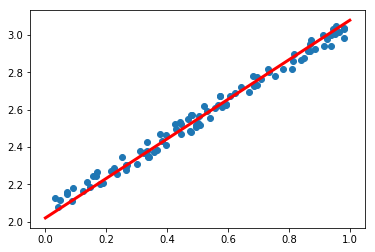

In [5]:
# 产生一个线性模型
x_data = np.random.rand(100)
noise = 0.1 * np.random.rand(100)
y_data = x_data * 1 + 2 + noise


# 声明变量
k = tf.Variable(.0)
b = tf.Variable(.0)
y = k*x_data + b

# 代价函数
loss = tf.reduce_mean(tf.square(y_data - y))

# 优化器
gd = tf.train.GradientDescentOptimizer(0.2)

# 最小化代价函数（op）
train = gd.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20):
        sess.run(train)
        print("iter=", step, ", k=", sess.run(k), ", b=", sess.run(b))
    
    # 绘图
    k = sess.run(k);
    b = sess.run(b);
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot([0, 1], [b, k*1+b], '-r', lw=3)
    plt.show()



*  
**非线性回归**

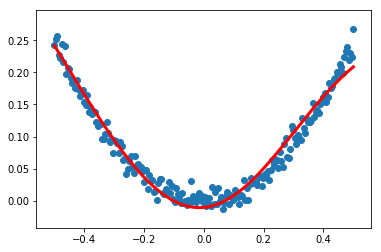

In [17]:
# 产生一个二次回归模型
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis] #column
noise = np.random.normal(0, 0.01, x_data.shape)
y_data = np.square(x_data) + noise

# 声明变量
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 定义网络结构
W_L1 = tf.Variable(tf.random_normal([1, 10]))
b_L1 = tf.Variable(tf.constant(0.1, shape = [1, 10]))
Wx_plus_b_L1 = tf.matmul(x, W_L1) + b_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

W_L2 = tf.Variable(tf.random_normal([10, 1]))
b_L2 = tf.Variable(tf.constant(0.1, shape = [1, 1]))
prediction = tf.matmul(L1, W_L2) + b_L2

# 代价函数
loss = tf.reduce_mean(tf.square(y_data - prediction))

# 优化器
gd = tf.train.GradientDescentOptimizer(0.2)

# 最小化代价函数（op）
train = gd.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    feed_dict = {x: x_data, y: y_data}
    
    for step in range(1000):
        sess.run(train, feed_dict)
#         print("iter=", step)
    
    # 绘图
    feed_dict = {x: x_data}
    predict_list = sess.run(prediction, feed_dict)
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, predict_list, '-r', lw=3)
    plt.show()

*  
**简单手写数字识别**

In [18]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) #這步有時候會失效

#因為數據集很大，故我們要用stochastic gradient descent，會將資料集分批次，並不會一次將所有資料拿來train (計算量很大)
#每一個批次的大小
batch_size = 100 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size  # // 在python中表示取商

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) # 28 * 28 = 784
y = tf.placeholder(tf.float32, [None, 10]) #輸出層，有十個神經元，每個神經元有一個激活值，十個激活值排成一個 1*10的向量

#建立一個簡單的神經網路 (只有輸出層，總共10個神經元)
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([1, 10]))
prediction = tf.nn.softmax(tf.matmul(x, W) + b)

#代價函數 : loss = mean((y - prediction)^2)
loss = tf.reduce_mean(tf.square(y - prediction))

#Gradient desent method  (learning rate = 0.2)
gd = tf.train.GradientDescentOptimizer(0.2)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()

#如果y標籤最大的值，與prediction標籤最大的值相等，則回傳true
#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
#轉換資料型態 boolean 轉成 float，接著在取平均值，得到準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21): #總共疊代21次 (outer loop)
        #每一次 outer loop 不一次拿所有的數據集，來做 Gradient desent，這就是 stochastic gradient descent
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次
            #利用 train.next_batch 函數，讀取一個batch的 x, y 存給 batch_xs, batch_ys
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys}  #拿來feed 的 dictionary
            sess.run(train, feed_dict)
        #每做完一次 outer loop 計算一次準確率
        outer_loop_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
        acc = sess.run(accuracy, outer_loop_feed_dict)
        print("Iter =" + str(epoch) + ", Testing Accuracy =" + str(acc))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz


URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>